In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import sys
sys.setrecursionlimit(10000)
constant = 101*101


In [2]:
class Node:
    def __init__(self,i,j,g,h,previous,counter,largerG):
        self.i = i
        self.j = j
        self.g = g
        self.h = h
        self.f = self.g + self.h
        self.h_new = None
        self.previous = previous
        self.counter = counter
        self.isBlocked = False
        # self.priority = self.f
        self.largerG = largerG
        if self.largerG:
            self.priority = constant*self.f - self.g
        else:
            self.priority = constant*self.f + self.g

    def updateFValue(self):
        self.f = (self.g + self.h_new if self.h_new else self.g+self.h)
        if self.largerG:
            self.priority = constant*self.f - self.g
        else:
            self.priority = constant*self.f + self.g

        # self.priority = self.f


In [3]:
class MinHeap:
    def __init__(self):
        self.heap = []
    
    def isEmpty(self):
        return len(self.heap) == 0
    
    def addNode(self, node):
        self.heap.append(node)
        self._heapifyUp()
        return self.heap

    def getMinNode(self):
        return self.heap[0]
    
    def popMinNode(self):
        if len(self.heap) == 0:
            return None
        else:
            minEle = self.heap[0]
            self.heap[0] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDown()
            return minEle

    def removeNode(self, node):
        z = search(Node)
        if z:
            removed = self.heap[z]
            self.heap[z] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDownInd(z)
            return removed
    
    def upsert(self,oldNode,newNode):
        z = self.search(oldNode)
        if z:
            self.heap[z] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDownInd(z)
            self.addNode(newNode)
            return self.heap
        else:
            self.addNode(newNode)
            return self.heap
        
    def search(self, node):
        heap = self.heap
        for x in range(0,len(heap)):
            if self.heap[x].i == node.i and self.heap[x].j == node.j:
                return x
                
    def _heapifyUpInd(self, i):
        heap = self.heap
        size = i
        if len(heap) == 1 :
            return heap
        else:
            while size//2 > 0:
                parent = (size)//2 - 1
                curLast = size-1
                if heap[curLast].priority < heap[parent].priority:
                    swpNode = heap[curLast]
                    heap[curLast] = heap[parent]
                    heap[parent] = swpNode
                size = size//2
            return heap

    def _heapifyUp(self):
        self._heapifyUpInd(len(self.heap))
    
    def _heapifyDownInd(self,ind):
        size = len(self.heap)
        curr = ind
        while (curr+1)*2 <= size:
            minInd = self._nextMinNode(curr)      
            if self.heap[minInd].priority < self.heap[curr].priority:
                swpNode = self.heap[minInd]
                self.heap[minInd] = self.heap[curr]
                self.heap[curr] = swpNode
            curr = minInd
        return self.heap

    def _heapifyDown(self):
        self._heapifyDownInd(0)

    def _nextMinNode(self, index):
        if (index+1)*2 + 1 > len(self.heap):
            return index*2 + 1 
        else:
            if self.heap[index*2 + 1].priority < self.heap[index*2 + 2].priority:
                return index*2 + 1
            else:
                return index*2 + 2
    
    def printHeap(self):
        heap = self.heap
        for x in range(0,len(heap)):
            print("i-",heap[x].i,"j-",heap[x].j,"f-",heap[x].f, "p-",heap[x].priority)
        
    def size(self):
        return len(self.heap)


In [4]:
def generate_random_matrix(input,visited,i,j):
    visited[i][j] = 1
    input[i][j] = 1

    if  j + 1 < len(input) and input[i][j+1] == 0: 
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i,j+1)
        else:
            visited[i][j+1] = 1
            input[i][j+1] = -1
      
    if  j - 1 >= 0 and input[i][j-1] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i,j-1)
        else:
            visited[i][j-1] = 1
            input[i][j-1] = -1

    if i -1 >=0 and input[i-1][j] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i-1,j)
        else:
            visited[i-1][j] = 1
            input[i-1][j] = -1

    if i + 1 < len(input) and input[i+1][j] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i+1,j)
        else:
            visited[i+1][j] = 1
            input[i+1][j] = -1

def get_rand_value():
    rand_value = random.randint(0,9)
    if rand_value in [0,2]:
        return -1
    else:
        return 1

def get_unvisited_indices(visited):
    for i in range(0,len(visited)):
        for j in range(0,len(visited)):
            if visited[i][j] == 0:
                return i,j
    return -1,-1


In [5]:
def updateCounter(i,j,nodes,counter):
    if i >= 0 and i < len(nodes) and j>=0 and j < len(nodes) and nodes[i][j].counter != counter:
        nodes[i][j].counter = counter
        nodes[i][j].g = sys.maxsize - 1000
        nodes[i][j].updateFValue()
        # if nodes[i][j].h_new != None:
        #     nodes[i][j].f = nodes[i][j].g + nodes[i][j].h_new
        # else:
        #     nodes[i][j].f = nodes[i][j].g + nodes[i][j].h
        nodes[i][j].previous = None
    


def addValidNeighbors(open_list, nodes, current_node, counter):
    i = current_node.i
    j = current_node.j
    updateCounter(i - 1,j,nodes,counter)
    if i - 1 >= 0 and current_node.g + 1 < nodes[i - 1][j].g and nodes[i - 1][j].isBlocked == False:
        nodes[i - 1][j].g = current_node.g + 1
        nodes[i - 1][j].updateFValue()
        nodes[i - 1][j].previous = nodes[i][j]
        open_list.upsert(nodes[i-1][j],nodes[i-1][j])
    
    updateCounter(i + 1,j,nodes,counter)
    if i + 1 < len(maze) and current_node.g + 1 < nodes[i + 1][j].g and nodes[i + 1][j].isBlocked == False:
        nodes[i + 1][j].g = current_node.g + 1
        nodes[i + 1][j].updateFValue()
        nodes[i + 1][j].previous = nodes[i][j]
        open_list.upsert(nodes[i+1][j],nodes[i+1][j])

    updateCounter(i,j - 1,nodes,counter)
    if j - 1 >= 0 and current_node.g + 1 < nodes[i][j - 1].g and nodes[i][j - 1].isBlocked == False:
        nodes[i][j - 1].g = current_node.g + 1
        nodes[i][j-1].updateFValue()
        nodes[i][j - 1].previous = nodes[i][j]
        open_list.upsert(nodes[i][j-1],nodes[i][j-1])

    updateCounter(i,j + 1,nodes,counter)
    if j + 1 < len(maze) and current_node.g + 1 < nodes[i][j + 1].g and nodes[i][j + 1].isBlocked == False:
        nodes[i][j + 1].g = current_node.g + 1
        nodes[i][j+1].updateFValue()
        nodes[i][j + 1].previous = nodes[i][j]
        open_list.upsert(nodes[i][j+1],nodes[i][j+1])


def computePath(maze,goal_node,nodes,open_list,counter,expanded_nodes):
    
    while open_list.size() > 0:   
        current_node = open_list.popMinNode()
        expanded_nodes.append(current_node)
#         print('current node',current_node.i,current_node.j)
        if nodes[goal_node.i][goal_node.j].priority > current_node.priority:
            addValidNeighbors(open_list,nodes, current_node, counter)
        else:
#             print('Goal node is reached')
            return True
    return False

def updateIsBlocked(nodes,i,j,value):
    if i >= 0 and i < len(nodes) and j>=0 and j < len(nodes):
        nodes[i][j].isBlocked = value

def updateBlockedNeighbors(node,nodes):
    i = node.i
    j = node.j
    if i-1 >= 0 and maze[i-1][j] == -1:
        nodes[i-1][j].isBlocked = True
    if j-1 >= 0 and maze[i][j-1] == -1:
        nodes[i][j-1].isBlocked = True
    if i+1 < len(nodes) and maze[i+1][j] == -1:
        nodes[i+1][j].isBlocked = True
    if j+1 < len(nodes) and maze[i][j+1] == -1:
        nodes[i][j+1].isBlocked = True


def traverseNodes(start_node,goal_node,maze,nodes,backward):
    # generate_dup_maze(goal_node,maze,current_node)
    # Need to add logic to see we have to open the adjacent nodes when the agent
    # is travelling

    node = goal_node
    node_list = list()
    path_visualization_matrix = [0] * len(maze)
    distance_from_goal = 0
    for i in range(0,size):
        path_visualization_matrix[i] = [0] * len(maze)

    while node != start_node:
#             print('traversing nodes in reverse order ',node.i,node.j)
            path_visualization_matrix[node.i][node.j] = 1        
            node_list.append(node)
            old_node = node
            node = node.previous
            old_node.previous = None
            distance_from_goal = distance_from_goal + 1
    
    path_visualization_matrix[node.i][node.j] = 1
#     showMaze(path_visualization_matrix,1)
    node_list.append(node)
    if backward:
        node_list.reverse()
#     print('traversing nodes in reverse order ',node.i,node.j)    
    previous_node = node_list.pop()
    maze[previous_node.i][previous_node.j] = 2
        
    while len(node_list) > 0:
        current_node = node_list.pop()
#         print('traversing nodes ',current_node.i,current_node.j)
        
        if maze[current_node.i][current_node.j] == -1:
#             print('Blocked at node ',previous_node.i,previous_node.j)
            current_node = previous_node
            break
        else:
            updateBlockedNeighbors(current_node,nodes)
            maze[current_node.i][current_node.j] = 2
            current_node.previous = previous_node
            previous_node = current_node
#     showMaze(maze,1)
    return distance_from_goal,current_node

def updateHNew(expanded_nodes,distance_from_destination):
    for node in expanded_nodes:
        if distance_from_destination != None:
            node.h_new = distance_from_destination - node.g
        else:
            node.h_new = None
            
def AStarSearchBackwards(nodes,current_node,maze,goal_node,open_list,adaptive):
    expanded_nodes = []
    counter = 0
    total_expanded_nodes = 0
    while current_node.i != goal_node.i or current_node.j != goal_node.j:
        counter = counter + 1
        # maze[current_node.i][current_node.j] = 2
        updateBlockedNeighbors(current_node,nodes)
        goal_node.g = 0
        goal_node.updateFValue()
        goal_node.counter = counter
        i = goal_node.i
        j = goal_node.j
        if i - 1 >= 0 and nodes[i - 1][j].isBlocked == False:
            nodes[i - 1][j].g = 1
            nodes[i - 1][j].updateFValue()
            nodes[i - 1][j].counter = counter
            nodes[i - 1][j].previous = goal_node
            open_list.addNode(nodes[i-1][j])
        if i + 1 < len(maze) and nodes[i + 1][j].isBlocked == False:
            nodes[i + 1][j].g = 1
            nodes[i + 1][j].updateFValue()
            nodes[i + 1][j].counter = counter
            nodes[i + 1][j].previous = goal_node
            open_list.addNode(nodes[i+1][j])
        if j - 1 >= 0 and nodes[i][j - 1].isBlocked == False:
            nodes[i][j - 1].g = 1
            nodes[i][j - 1].updateFValue()
            nodes[i][j - 1].counter = counter
            nodes[i][j - 1].previous = goal_node
            open_list.addNode(nodes[i][j-1])
        if j + 1 < len(maze) and nodes[i][j + 1].isBlocked == False:
            nodes[i][j + 1].g = 1
            nodes[i][j + 1].updateFValue()
            nodes[i][j + 1].counter = counter
            nodes[i][j + 1].previous = goal_node
            open_list.addNode(nodes[i][j+1])

        current_node.g = sys.maxsize - 1000
        nodes[current_node.i][current_node.j].updateFValue()
        old_expanded_nodes = expanded_nodes
        expanded_nodes = []
        can_reach = computePath(maze,current_node,nodes,open_list,counter,expanded_nodes)
        if adaptive:
            updateHNew(old_expanded_nodes,None)
        total_expanded_nodes = total_expanded_nodes + len(expanded_nodes)
        open_list = MinHeap()
        if can_reach == False:
            print('cannot reach destination')
            break
        distance_from_node,current_node = traverseNodes(goal_node,current_node,maze,nodes,True)
        if adaptive:
            updateHNew(expanded_nodes,distance_from_node)
        
#         print('new current node is',current_node.i,current_node.j)
#     print('Total number of expanded nodes in the search process ',total_expanded_nodes)
    return total_expanded_nodes, can_reach

def AStarSearch(nodes,current_node,maze,goal_node,open_list,adaptive):
    expanded_nodes = []
    counter = 0
    total_expanded_nodes = 0
    while current_node.i != goal_node.i or current_node.j != goal_node.j:
        counter = counter + 1
        maze[current_node.i][current_node.j] = 2
        current_node.g = 0
        current_node.updateFValue()
        current_node.counter = counter
        i = current_node.i
        j = current_node.j
        if i - 1 >= 0 and maze[i - 1][j] == -1:
            updateIsBlocked(nodes,i - 1,j,True)
        elif i - 1 >= 0:
            nodes[i - 1][j].g = 1
            nodes[i - 1][j].updateFValue()
            nodes[i - 1][j].counter = counter
            nodes[i - 1][j].previous = current_node
            open_list.addNode(nodes[i-1][j])
        if i + 1 < len(maze) and maze[i + 1][j] == -1:
            updateIsBlocked(nodes,i + 1,j,True)
        elif i + 1 < len(maze):
            nodes[i + 1][j].g = 1
            nodes[i + 1][j].updateFValue()
            nodes[i + 1][j].counter = counter
            nodes[i + 1][j].previous = current_node
            open_list.addNode(nodes[i+1][j])
        if j - 1 >= 0 and maze[i][j - 1] == -1:
            updateIsBlocked(nodes,i,j - 1,True)
        elif j - 1 >= 0:
            nodes[i][j - 1].g = 1
            nodes[i][j - 1].updateFValue()
            nodes[i][j - 1].counter = counter
            nodes[i][j - 1].previous = current_node
            open_list.addNode(nodes[i][j-1])
        if j + 1 < len(maze) and maze[i][j + 1] == -1:
            updateIsBlocked(nodes,i,j + 1,True)
        elif j + 1 < len(maze):
            nodes[i][j + 1].g = 1
            nodes[i][j + 1].updateFValue()
            nodes[i][j + 1].counter = counter
            nodes[i][j + 1].previous = current_node
            open_list.addNode(nodes[i][j+1])

        goal_node.g = sys.maxsize - 1000
        nodes[goal_node.i][goal_node.j].updateFValue()
        old_expanded_nodes = expanded_nodes
        expanded_nodes = []
        can_reach = computePath(maze,goal_node,nodes,open_list,counter,expanded_nodes)
        if adaptive:
            updateHNew(old_expanded_nodes,None)
        total_expanded_nodes = total_expanded_nodes + len(expanded_nodes)
        open_list = MinHeap()
        if can_reach == False:
            print('cannot reach destination')
            break
        distance_from_node,current_node = traverseNodes(current_node,goal_node,maze,nodes,False)
        if adaptive:
            updateHNew(expanded_nodes,distance_from_node)
        
#         print('new current node is',current_node.i,current_node.j)
#     print('Total number of expanded nodes in the search process ',total_expanded_nodes)
    return total_expanded_nodes, can_reach


In [6]:
def showMaze(maze, show):
    if show:
        maze = np.array(maze)
        plt.imshow(maze)
        # plt.gca().axes.get_yaxis().set_visible(False)
        # plt.gca().axes.get_xaxis().set_visible(False)
        locator = matplotlib.ticker.MultipleLocator(5)
        plt.gca().yaxis.set_major_locator(locator)
        formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
        plt.gca().yaxis.set_major_formatter(formatter)
        plt.show()
        
def validMazeCell(maze, validCellsOnly):
    size = len(maze)
    if validCellsOnly:
        while True:
            i = random.randint(0,size - 1)
            j = random.randint(0,size - 1)
            if maze[i][j] == 1:
                break
    else:
        i = random.randint(0,size - 1)
        j = random.randint(0,size - 1)
    return i,j
    

Expanded nodes array 1  [16814, 107641, 14696, 9038, 38126, 89536, 46446, 42862, 109180, 144976, 90388, 231922, 50763, 9174, 72512, 139449, 22551, 168150, 97352, 143398, 569, 8723, 87020, 22312, 78622, 146974, 162483, 395, 150982, 5139, 84295, 131453, 7404, 107196, 42907, 33078, 4665, 24974, 63516, 68120, 41883, 53172, 79011, 23130, 156003, 19404, 140585, 14442, 189666, 17226]
Expanded nodes array 2  [12783, 67860, 14714, 6705, 20402, 40562, 38606, 22671, 61765, 69244, 50825, 161812, 28574, 7309, 81451, 85539, 20811, 190780, 84606, 66713, 569, 6948, 48301, 20828, 27353, 92765, 69276, 212, 80461, 3447, 75430, 93079, 4303, 81896, 21266, 12822, 9676, 25234, 30169, 56356, 5921, 28793, 36364, 11774, 112672, 11443, 59235, 7355, 128737, 10028]


/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:90: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:91: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


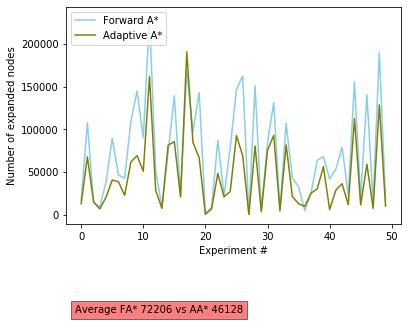

In [7]:
# adaptive vs forward a*
expanded_nodes_length_1 = []
expanded_nodes_length_2 = []
for k in range(0,50):
    size = 101
    maze = [0] * size
    maze_for_second_run = [0] * size
    visited = [0] * size

    for i in range(0,size):
        maze[i] = [0] * size
        maze_for_second_run[i] = [0] * size

    for i in range(0,size):
        visited[i] = [0] * size
                            
    i = 0
    j = 0

    while True:
        generate_random_matrix(maze,visited,i,j)
        i,j = get_unvisited_indices(visited)
        if i == -1 and j == -1:
            break

    for i in range(0,size):
        for j in range(0,size):
            maze_for_second_run[i][j] = maze[i][j]

    nodes = [0] * size
    
    validCellsOnly = True
    source_i, source_j = validMazeCell(maze,validCellsOnly)
    destination_i, destination_j = validMazeCell(maze,validCellsOnly)
    
    
    largerG = True
    for i in range(0,size):
        nodes[i] = [0] * size

    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    open_list = MinHeap()
#     print(maze)
    
#     showMaze(maze,1)

    
    adaptive = False
    
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list,adaptive)
    if can_reach:
        expanded_nodes_length_1.append(total_expanded_nodes)
#     print(maze)
#     showMaze(maze,1)


    open_list = MinHeap()
#     print(maze_for_second_run)
#     showMaze(maze_for_second_run,1)

    largerG = True
    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    adaptive = True
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze_for_second_run,nodes[destination_i][destination_j],open_list,adaptive)
    if can_reach:
        expanded_nodes_length_2.append(total_expanded_nodes)
#     showMaze(maze_for_second_run,1)



print('Expanded nodes array 1 ',expanded_nodes_length_1)
print('Expanded nodes array 2 ',expanded_nodes_length_2)

avgForwardA = int(sum(expanded_nodes_length_1) / len(expanded_nodes_length_1))
avgAdaptiveA = int(sum(expanded_nodes_length_2) / len(expanded_nodes_length_2))

# print('Average FA*', avgForwardA, 'vs AA*', avgAdaptiveA )

import numpy as np
import pandas as pd

df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Forward A*')
plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Adaptive A*')
plt.xlabel('Experiment #')
plt.ylabel('Number of expanded nodes')
plt.legend(['Forward A*', 'Adaptive A*'], loc='upper left')

txt_string = 'Average FA* ' + str(avgForwardA) +' vs AA* ' + str(avgAdaptiveA)

plt.text(-1, -115000, txt_string, bbox=dict(facecolor='red', alpha=0.5))

plt.show()




In [8]:

# import numpy as np
# import pandas as pd

# df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
# df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
# plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Forward A*')
# plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Backward A*')
# plt.xlabel('Experiment #')
# plt.ylabel('Number of expanded nodes')
# plt.legend(['Repeated Forward A*', 'Repeated Backward A*'], loc='upper left')

# txt_string = 'Average RFA* ' + str(RFA) +' vs RBA* ' + str(RBA)

# plt.text(-1, -125000, txt_string, bbox=dict(facecolor='yellow', alpha=0.5))

# plt.show()

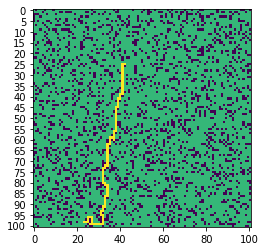

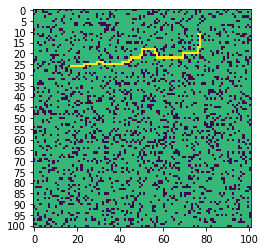

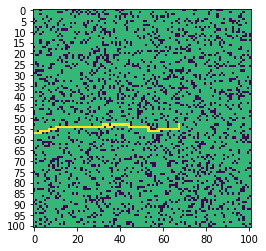

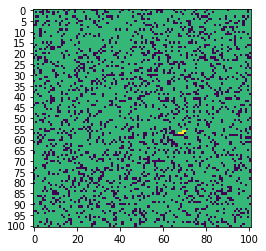

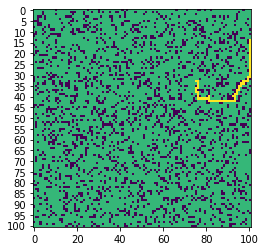

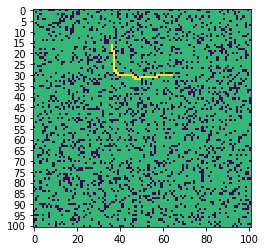

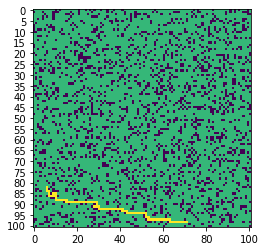

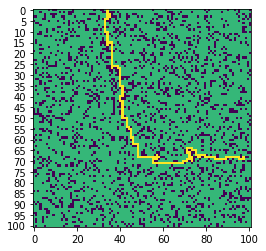

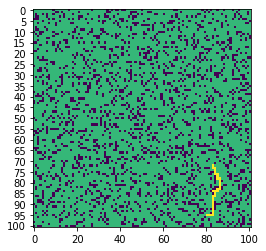

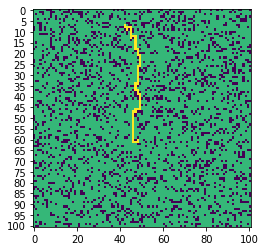

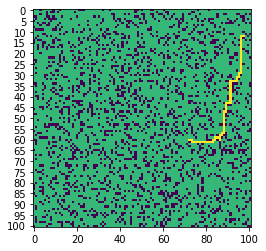

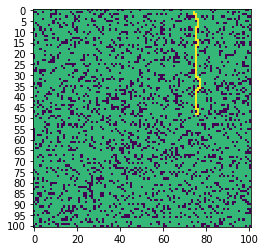

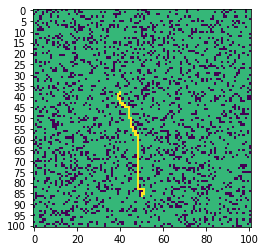

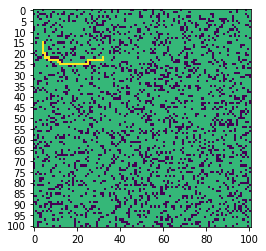

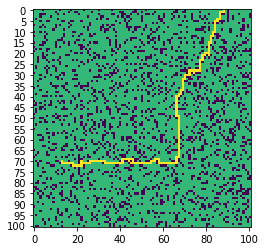

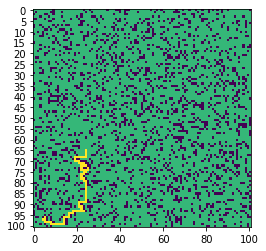

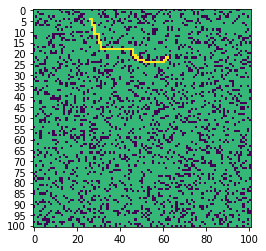

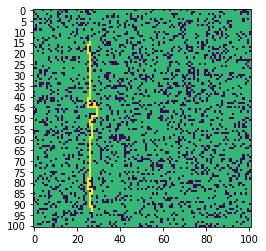

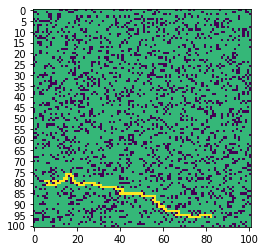

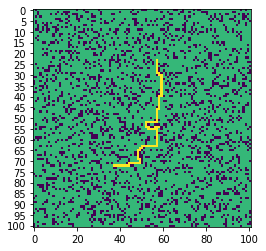

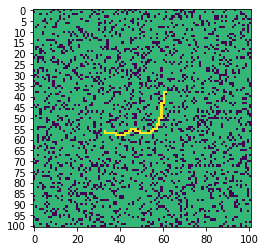

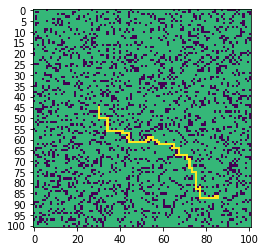

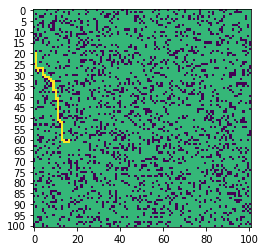

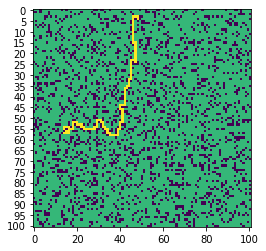

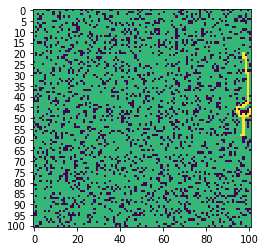

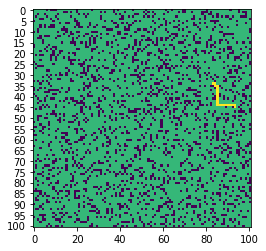

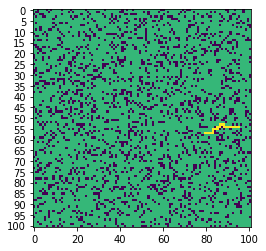

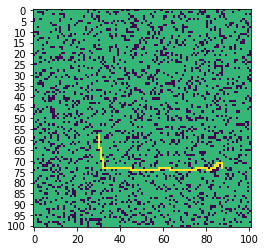

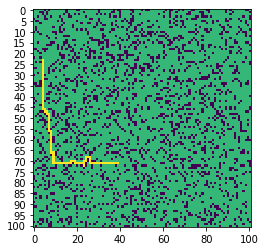

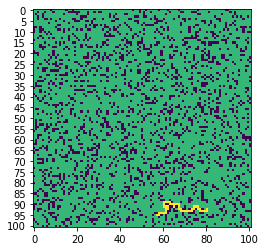

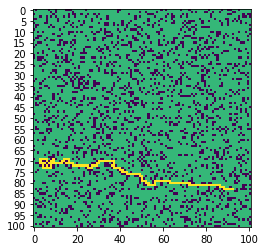

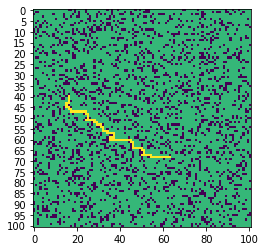

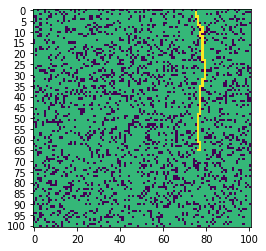

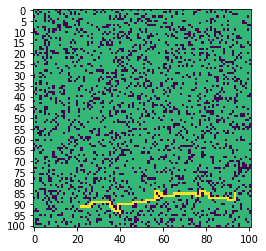

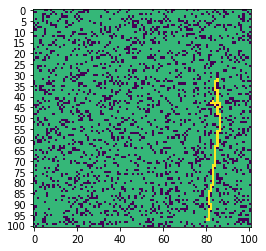

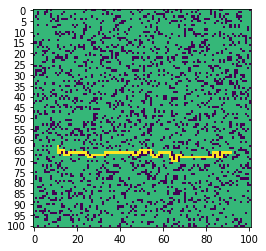

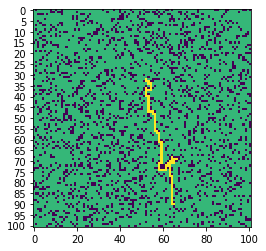

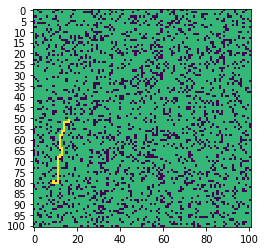

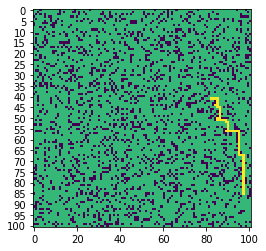

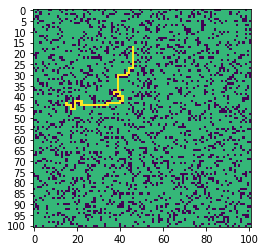

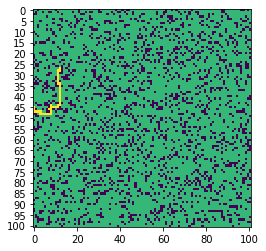

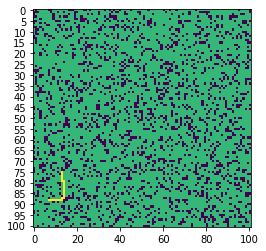

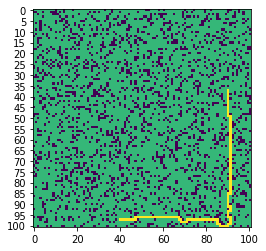

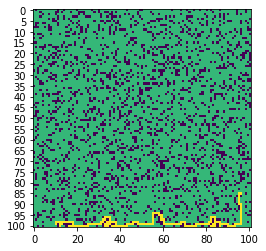

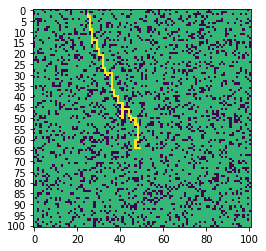

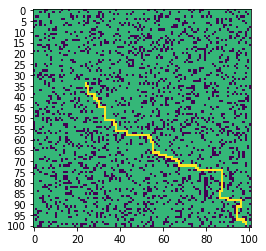

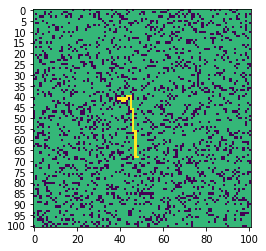

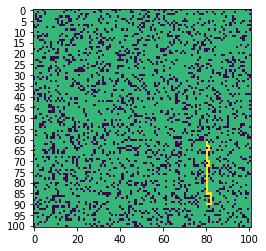

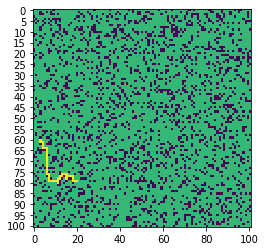

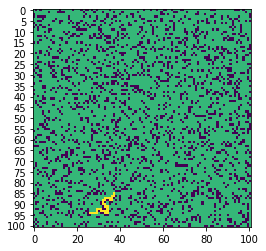

Expanded nodes array 1  [54894, 103353, 37658, 1526, 32198, 32744, 54818, 54497, 4229, 33333, 27505, 16161, 41914, 48922, 252951, 75995, 123116, 145899, 117493, 104504, 49177, 131846, 48988, 173477, 16995, 4795, 4391, 11471, 28136, 4017, 154805, 125729, 16790, 17856, 15310, 49385, 84805, 36757, 23763, 151865, 57228, 5197, 46349, 91286, 50179, 252069, 11347, 3520, 21329, 13182]
Expanded nodes array 2  [55246, 100669, 35291, 1462, 35310, 6188, 54082, 59077, 4122, 22324, 26240, 17772, 57592, 8051, 252921, 74387, 96665, 144325, 115690, 103823, 48503, 124825, 11738, 167276, 16661, 7537, 3792, 17336, 18880, 2273, 152430, 104835, 19498, 18799, 16081, 25098, 99959, 36312, 22887, 150036, 62242, 5035, 46923, 90941, 30822, 240930, 3150, 3920, 2903, 12735]


/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:89: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:90: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


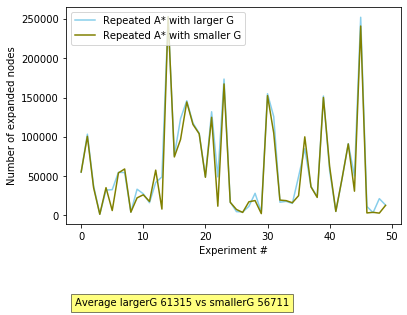

largerG* 61315 vs smalletG 56711


In [9]:
#  largerG vs smallerG
expanded_nodes_length_1 = []
expanded_nodes_length_2 = []
for k in range(0,50):
    size = 101
    maze = [0] * size
    maze_for_second_run = [0] * size
    visited = [0] * size

    for i in range(0,size):
        maze[i] = [0] * size
        maze_for_second_run[i] = [0] * size

    for i in range(0,size):
        visited[i] = [0] * size
                            
    i = 0
    j = 0

    while True:
        generate_random_matrix(maze,visited,i,j)
        i,j = get_unvisited_indices(visited)
        if i == -1 and j == -1:
            break

    for i in range(0,size):
        for j in range(0,size):
            maze_for_second_run[i][j] = maze[i][j]

    nodes = [0] * size

    validCellsOnly = True
    source_i, source_j = validMazeCell(maze,validCellsOnly)
    destination_i, destination_j = validMazeCell(maze,validCellsOnly)
    
    
    
    largerG = True
    for i in range(0,size):
        nodes[i] = [0] * size

    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    open_list = MinHeap()
#     print(maze)
    
#     showMaze(maze,1)

    
    adaptive = False
    
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list,adaptive)
    if can_reach:
        expanded_nodes_length_1.append(total_expanded_nodes)
#     print(maze)
#     showMaze(maze,1)


    open_list = MinHeap()
#     print(maze_for_second_run)
#     showMaze(maze_for_second_run,1)

    largerG = False
    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    adaptive = False
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze_for_second_run,nodes[destination_i][destination_j],open_list,adaptive)
    if can_reach:
        expanded_nodes_length_2.append(total_expanded_nodes)
#     showMaze(maze_for_second_run,1)



print('Expanded nodes array 1 ',expanded_nodes_length_1)
print('Expanded nodes array 2 ',expanded_nodes_length_2)

largerG = int(sum(expanded_nodes_length_1) / len(expanded_nodes_length_1))
smallerG = int(sum(expanded_nodes_length_2) / len(expanded_nodes_length_2))

import numpy as np
import pandas as pd

df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Repeated A* with larger G')
plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Repeated A* with smaller G')
plt.xlabel('Experiment #')
plt.ylabel('Number of expanded nodes')


labels = ['Repeated A* with larger G', 'Repeated A* with smaller G']
plt.legend(labels, loc='upper left')

txt_string = 'Average largerG ' + str(largerG) +' vs smallerG ' + str(smallerG)

plt.text(-1, -115000, txt_string, bbox=dict(facecolor='yellow', alpha=0.5))

plt.show()

print('largerG*', largerG, 'vs smalletG', smallerG )


start 59 94 end 37 33 count 1


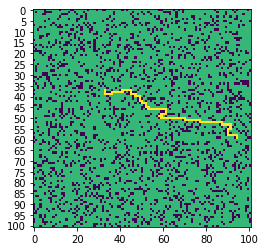

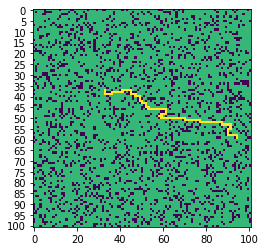

start 53 56 end 95 32 count 2


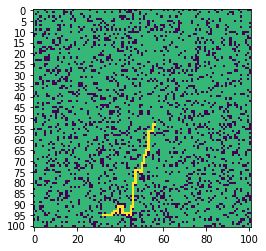

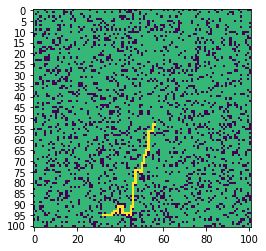

start 11 99 end 38 53 count 3


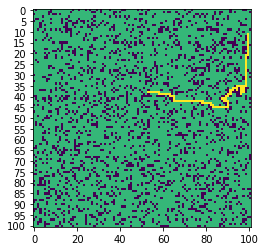

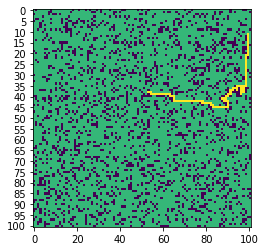

start 78 60 end 70 77 count 4


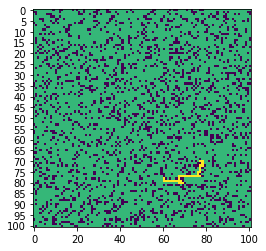

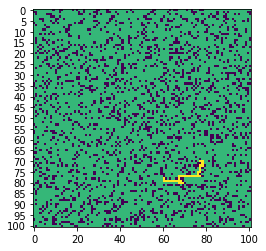

start 27 98 end 4 31 count 5


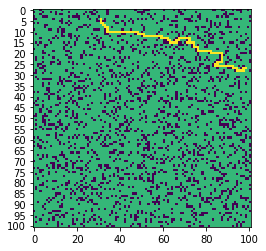

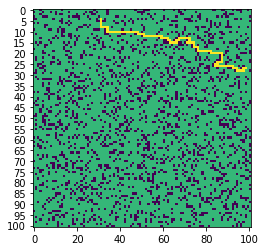

start 1 19 end 67 51 count 6


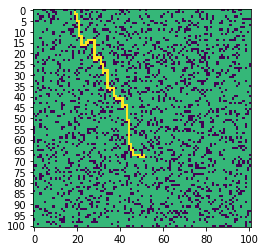

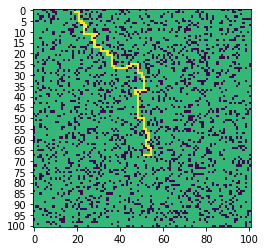

start 1 65 end 38 54 count 7


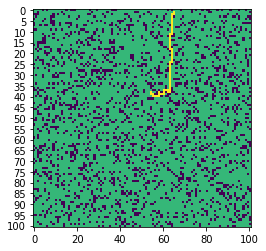

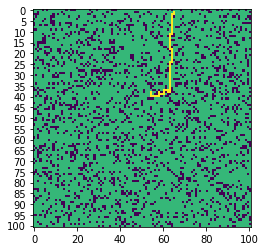

start 70 15 end 65 19 count 8


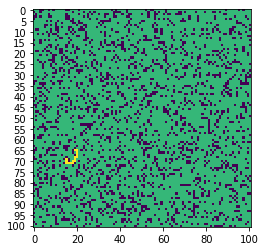

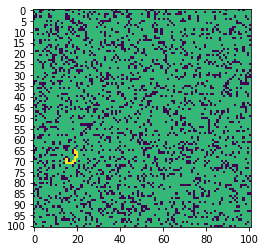

start 21 29 end 87 22 count 9


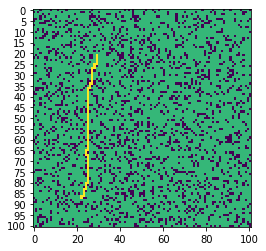

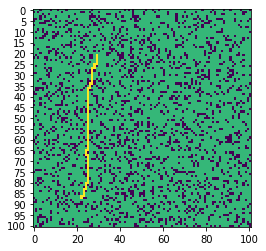

start 61 50 end 29 54 count 10


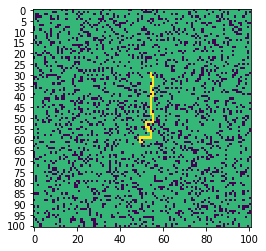

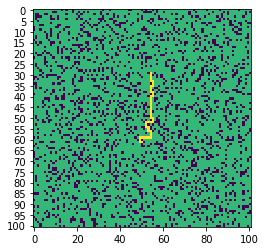

start 64 43 end 35 4 count 11


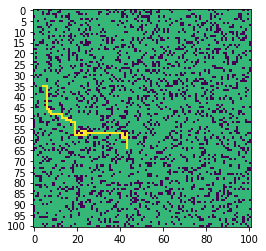

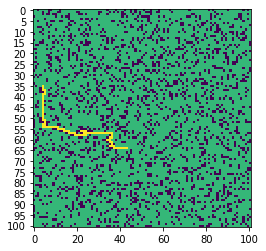

start 85 47 end 55 91 count 12


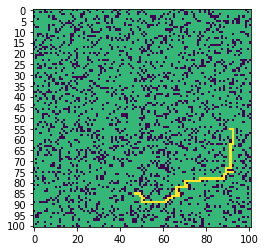

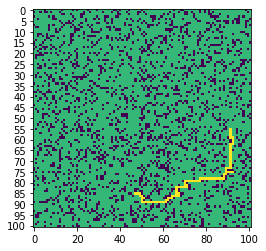

start 72 41 end 32 22 count 13


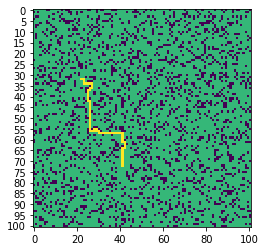

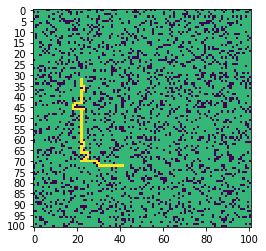

start 57 56 end 80 40 count 14


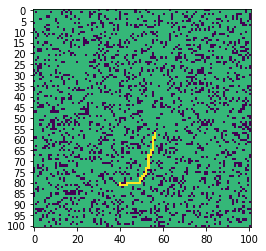

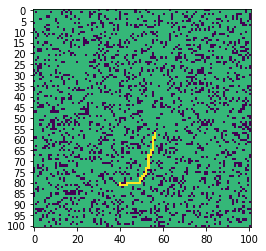

start 1 70 end 98 98 count 15


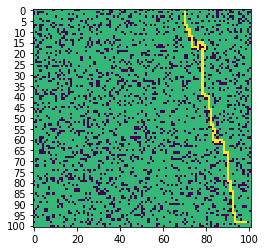

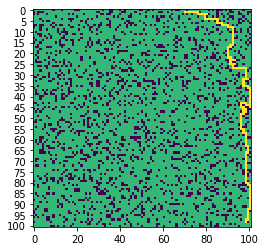

start 77 71 end 54 23 count 16


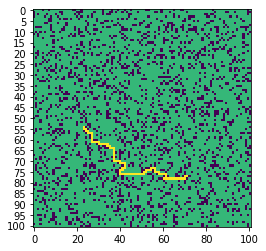

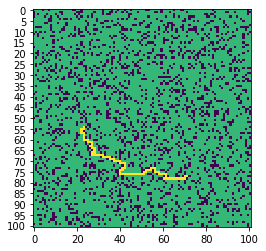

start 87 62 end 71 28 count 17


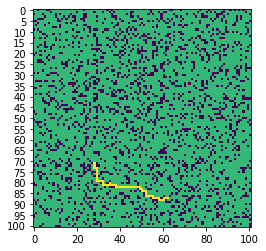

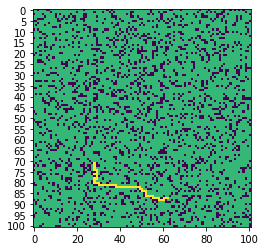

start 82 3 end 58 60 count 18


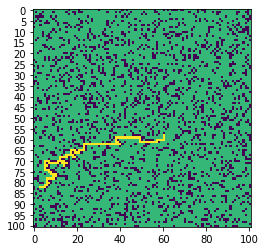

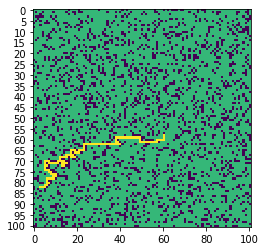

start 87 22 end 57 91 count 19


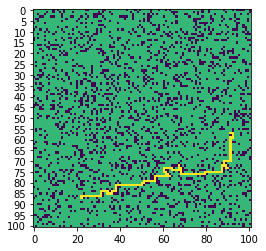

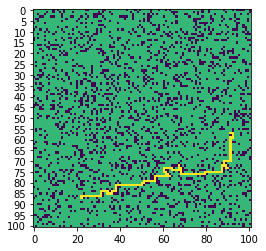

start 56 55 end 95 95 count 20


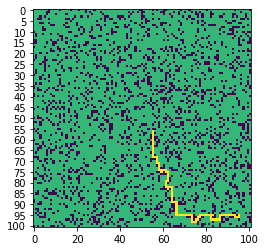

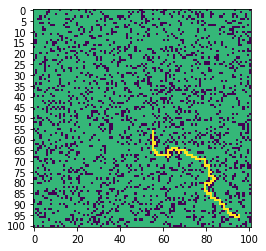

start 30 60 end 89 78 count 21


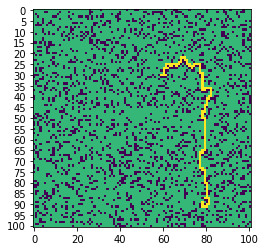

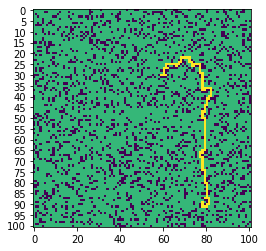

start 99 47 end 13 91 count 22


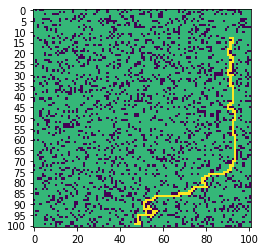

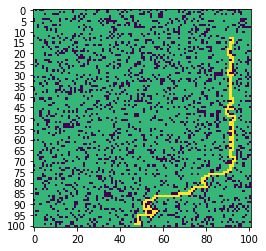

start 46 84 end 56 58 count 23


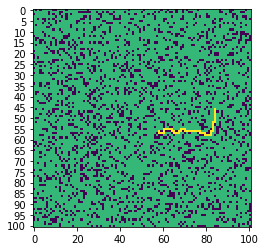

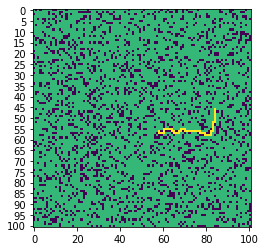

start 97 9 end 54 20 count 24


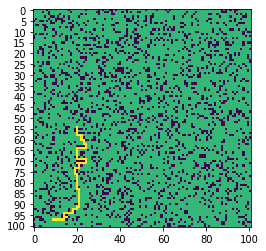

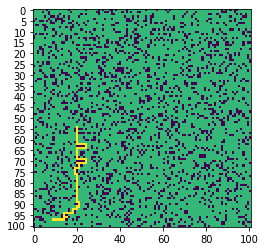

start 6 4 end 68 72 count 25


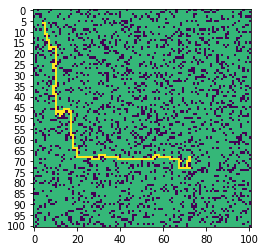

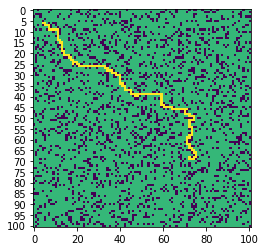

start 1 48 end 99 67 count 26


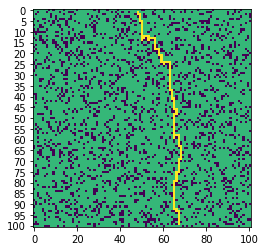

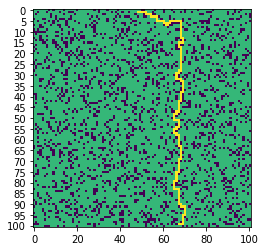

start 84 15 end 99 78 count 27


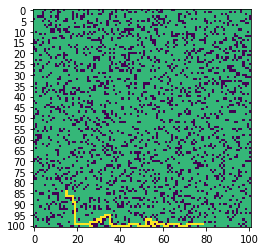

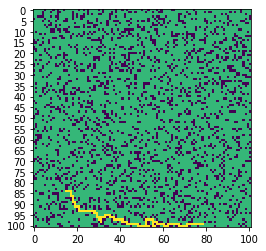

start 10 51 end 68 74 count 28


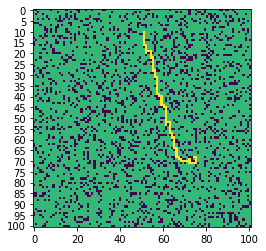

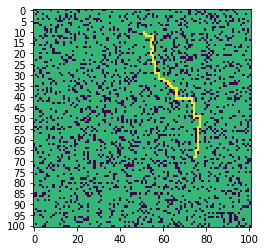

start 95 34 end 47 80 count 29


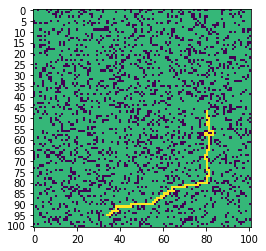

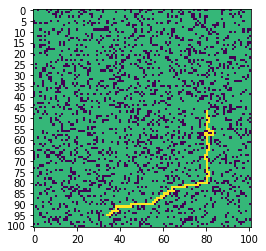

start 84 42 end 85 81 count 30


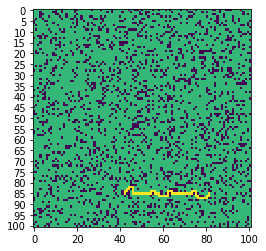

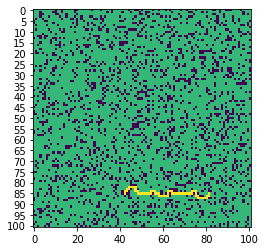

start 21 82 end 48 54 count 31


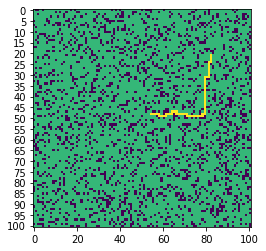

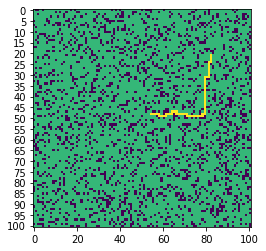

start 40 71 end 59 46 count 32


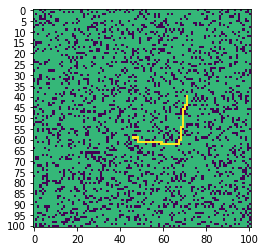

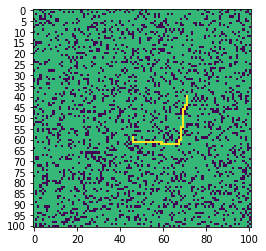

start 8 42 end 14 34 count 33


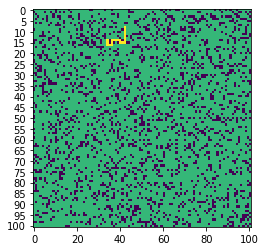

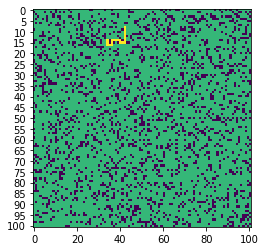

start 42 35 end 77 97 count 34


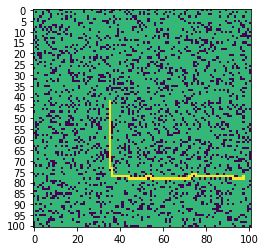

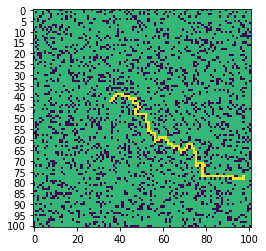

start 80 28 end 52 58 count 35


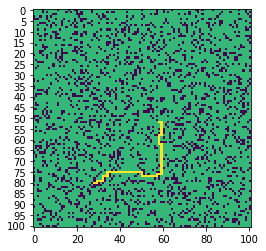

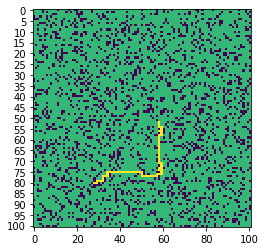

start 100 10 end 31 9 count 36


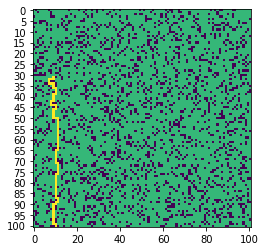

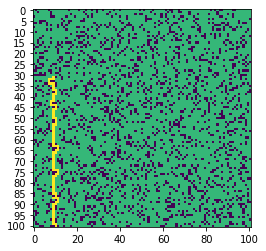

start 19 26 end 7 59 count 37


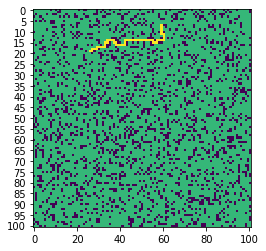

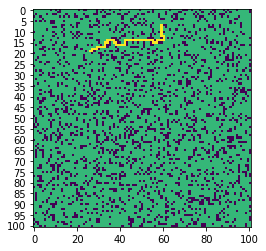

start 35 14 end 96 31 count 38


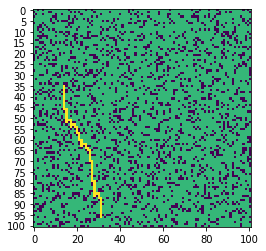

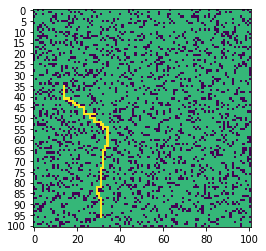

start 53 26 end 99 92 count 39


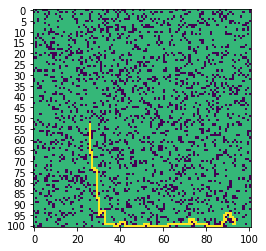

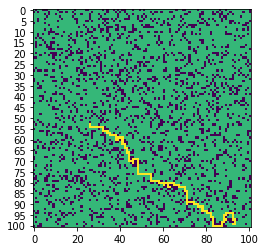

start 88 18 end 39 93 count 40


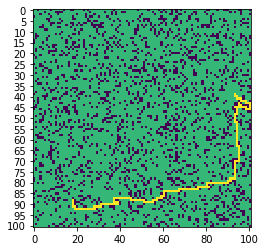

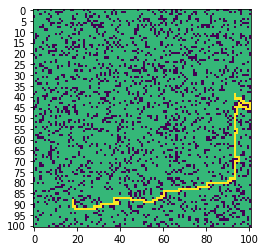

start 100 44 end 17 5 count 41


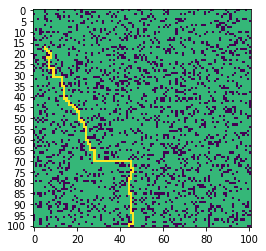

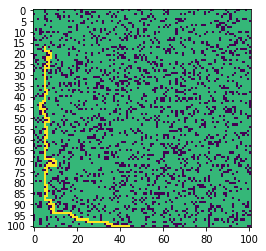

start 70 64 end 38 10 count 42


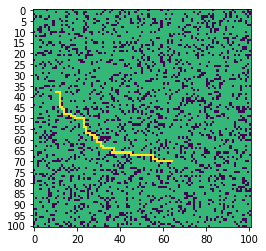

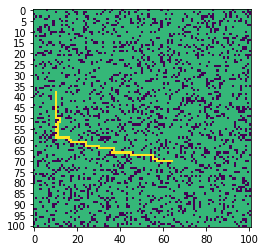

start 68 42 end 51 7 count 43


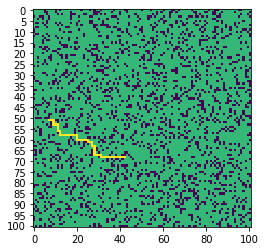

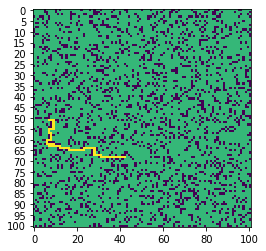

start 5 87 end 42 40 count 44


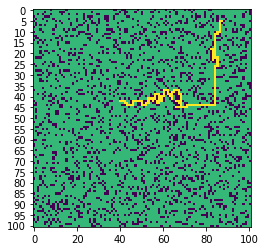

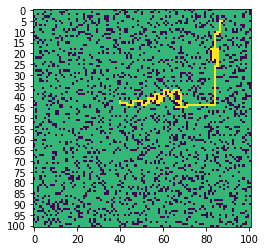

start 28 2 end 61 92 count 45


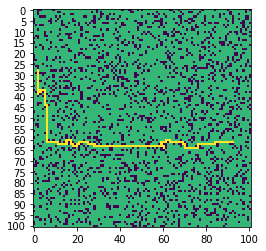

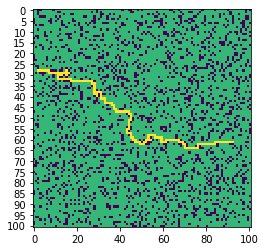

start 28 58 end 9 8 count 46


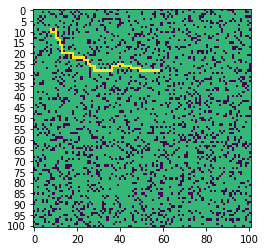

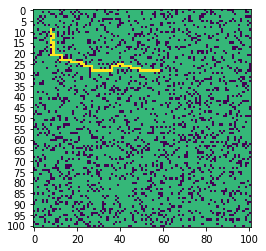

start 58 45 end 92 29 count 47


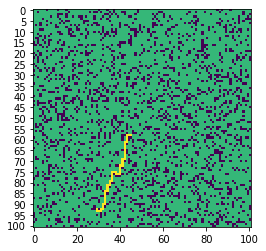

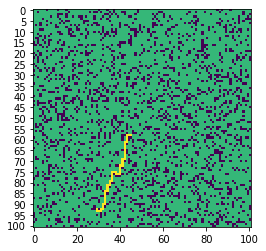

start 81 18 end 2 54 count 48


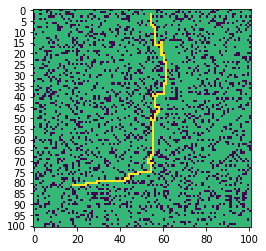

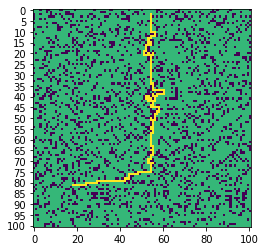

start 5 57 end 71 41 count 49


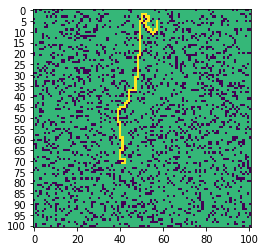

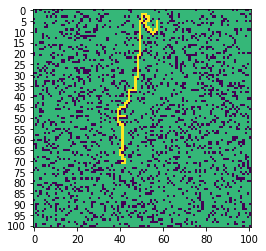

start 94 76 end 27 75 count 50


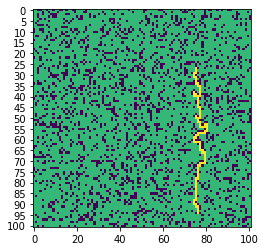

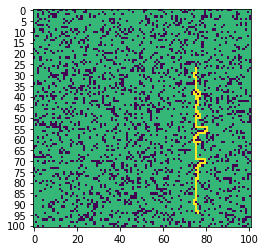

start 36 89 end 13 29 count 51


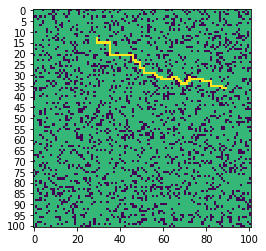

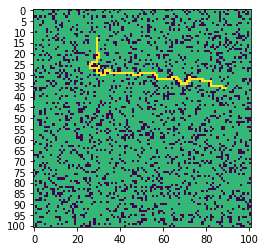

start 100 85 end 53 24 count 52


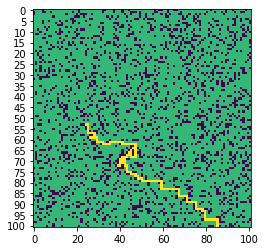

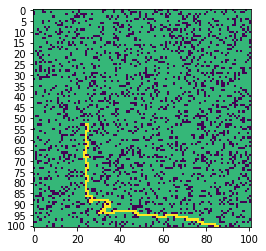

start 48 28 end 35 55 count 53


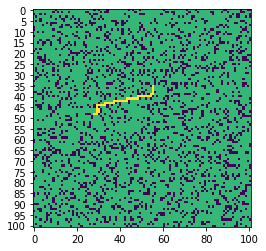

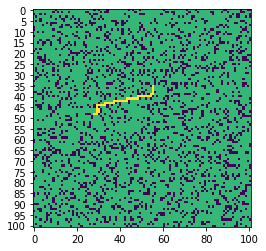

start 25 66 end 33 100 count 54


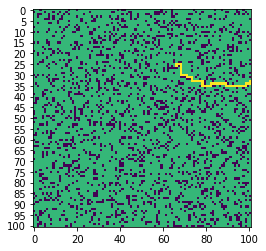

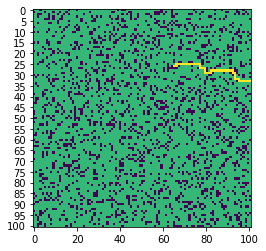

start 45 62 end 66 34 count 55


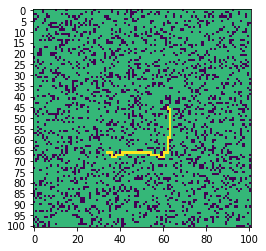

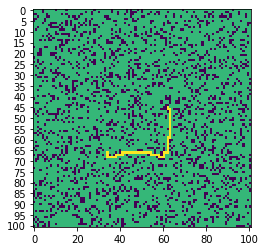

start 85 80 end 17 86 count 56


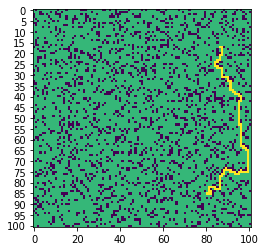

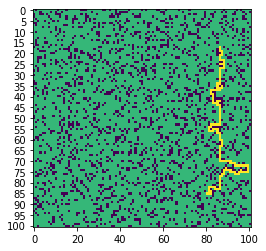

start 60 66 end 35 15 count 57


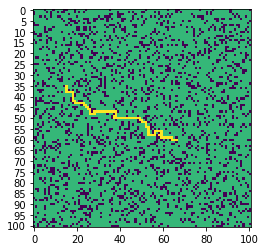

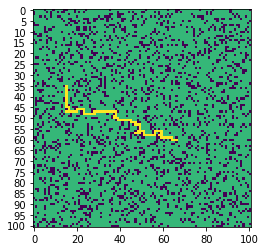

start 28 24 end 82 15 count 58


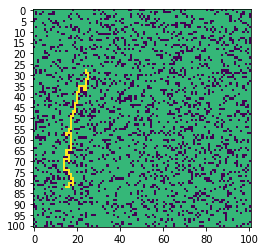

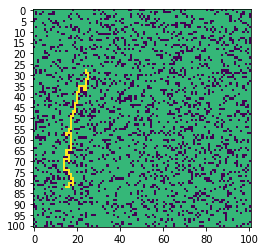

start 83 28 end 39 79 count 59


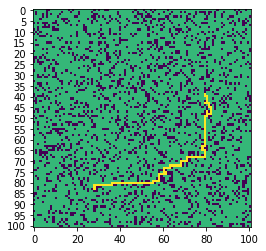

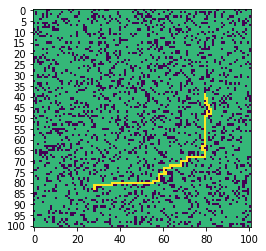

start 98 77 end 76 33 count 60


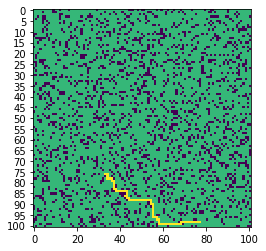

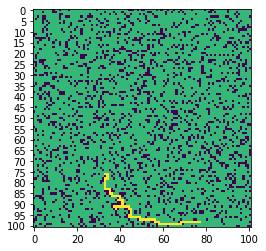

start 65 32 end 18 78 count 61


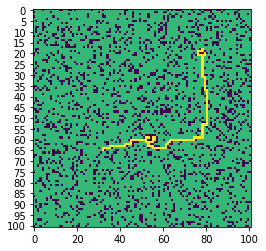

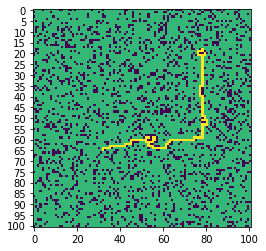

start 54 7 end 89 79 count 62


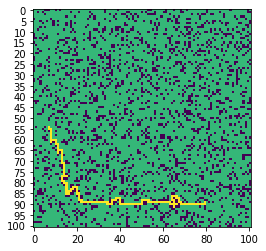

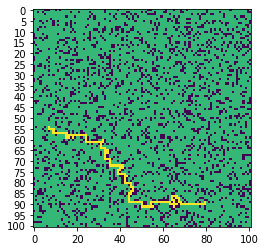

start 97 56 end 1 84 count 63


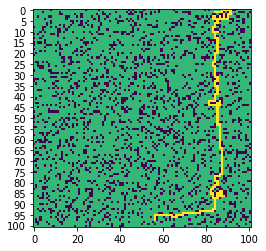

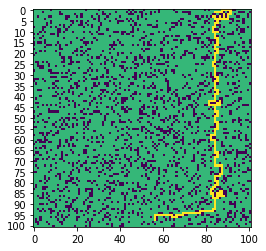

start 10 40 end 12 72 count 64


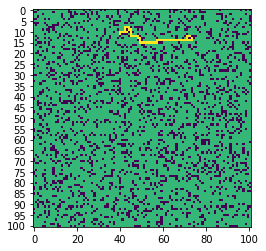

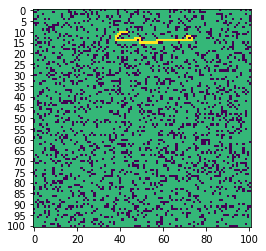

start 98 17 end 33 68 count 65


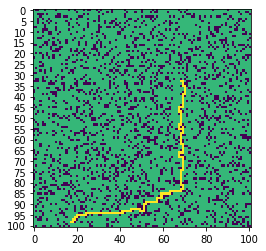

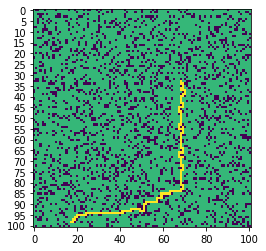

start 72 22 end 78 97 count 66


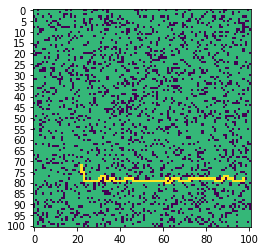

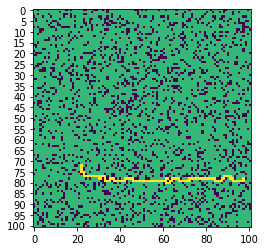

start 10 26 end 18 50 count 67


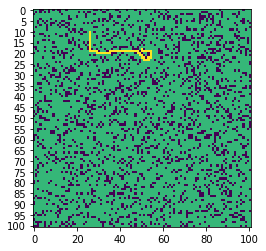

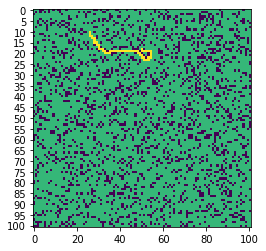

start 47 7 end 76 89 count 68


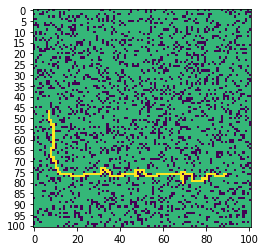

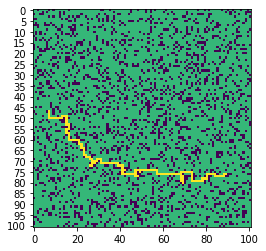

start 93 81 end 70 79 count 69


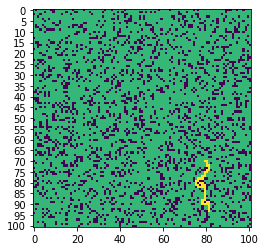

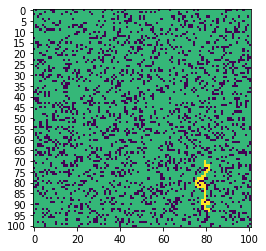

start 94 89 end 76 75 count 70


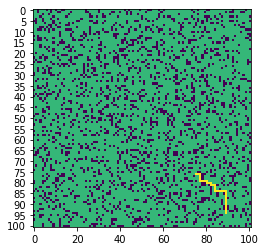

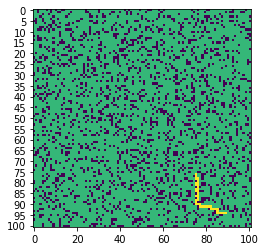

start 22 92 end 35 9 count 71


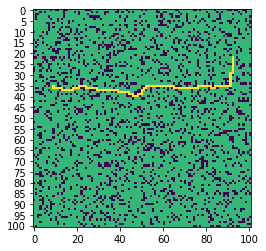

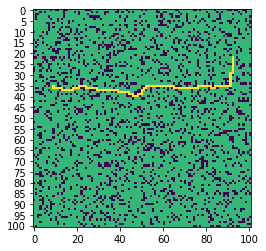

start 82 87 end 76 1 count 72


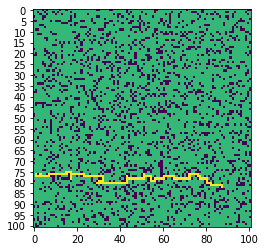

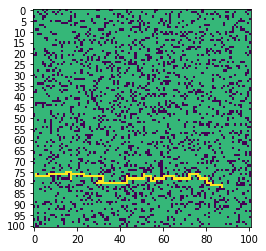

start 47 31 end 65 23 count 73


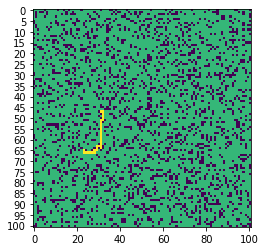

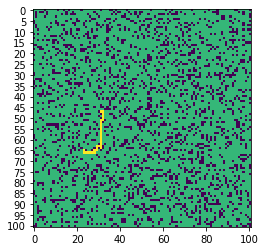

start 18 75 end 80 4 count 74


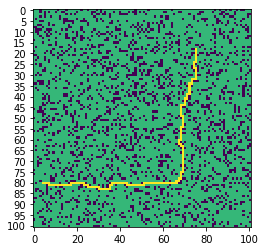

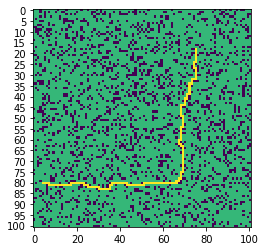

start 73 6 end 72 35 count 75


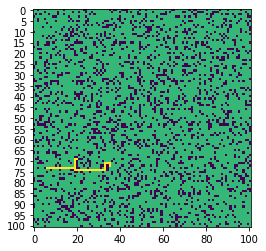

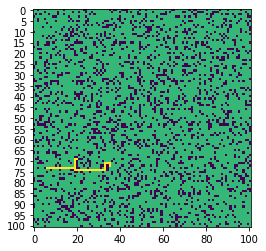

start 18 58 end 46 40 count 76


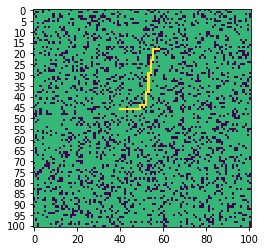

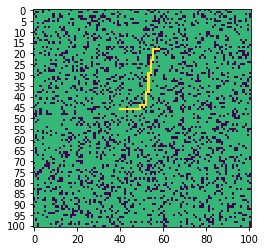

start 32 25 end 62 90 count 77


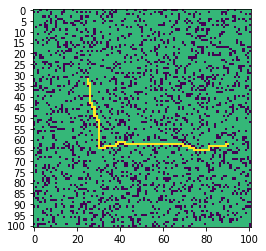

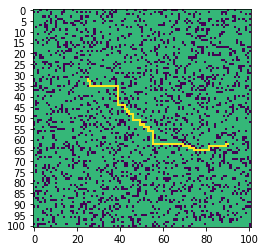

start 3 21 end 94 59 count 78


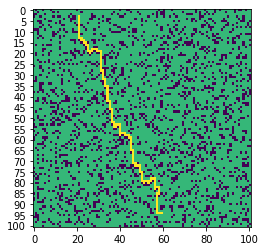

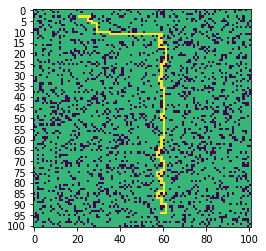

start 94 48 end 5 43 count 79


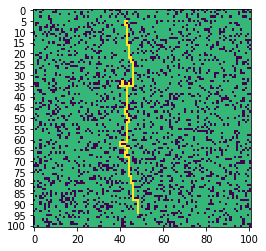

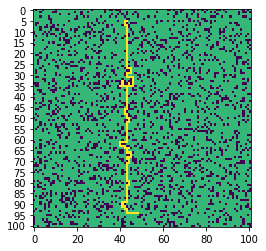

start 0 10 end 51 71 count 80


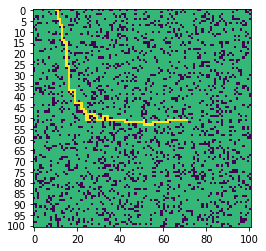

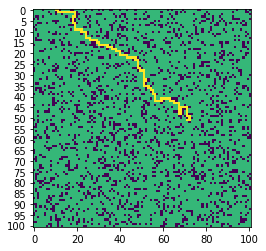

start 29 97 end 69 53 count 81


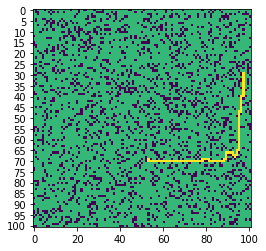

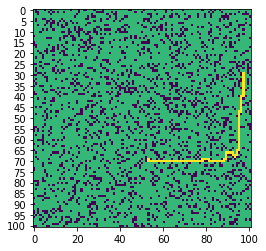

start 14 55 end 88 5 count 82


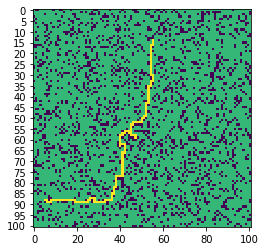

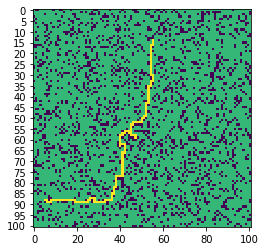

start 37 85 end 51 32 count 83


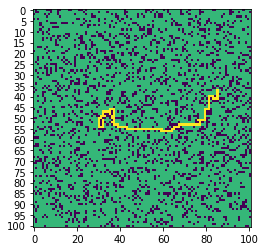

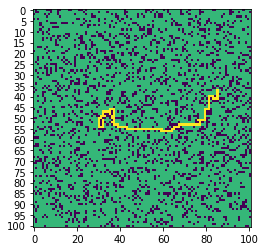

start 98 78 end 14 13 count 84


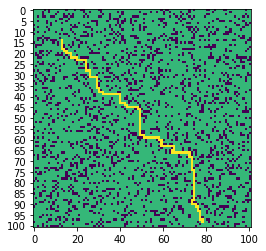

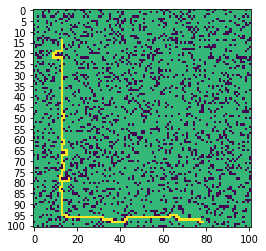

start 75 55 end 95 31 count 85


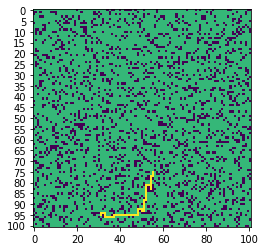

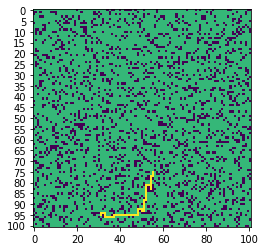

start 39 41 end 86 91 count 86


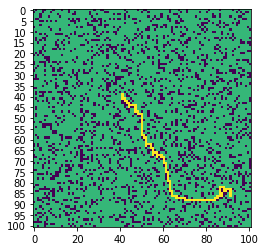

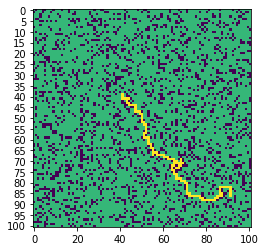

start 43 7 end 41 9 count 87


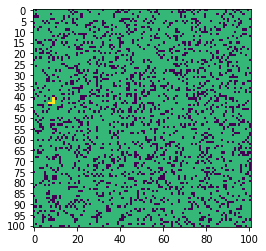

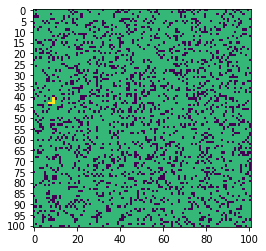

start 44 9 end 0 47 count 88


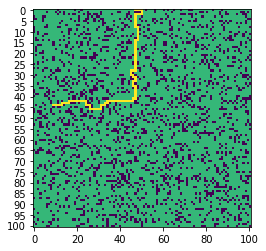

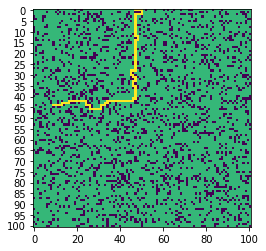

start 39 33 end 68 55 count 89


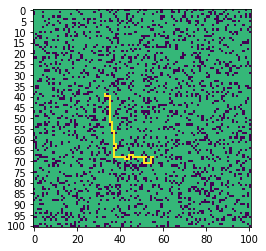

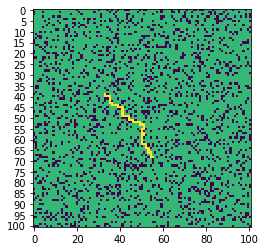

start 11 84 end 70 51 count 90


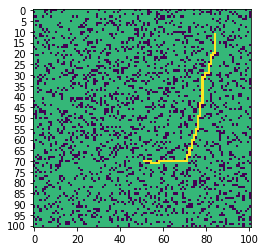

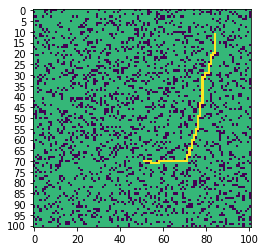

start 86 8 end 55 77 count 91


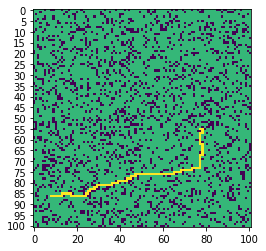

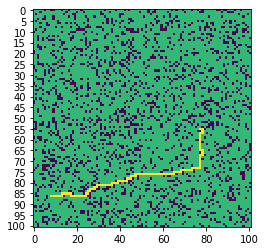

start 23 49 end 80 83 count 92


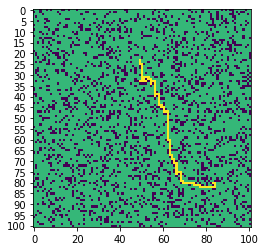

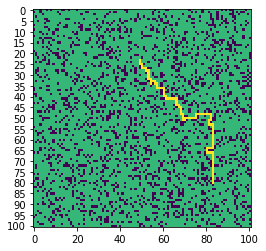

start 12 6 end 59 41 count 93


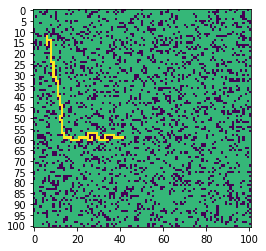

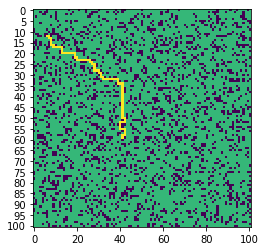

start 10 50 end 21 26 count 94


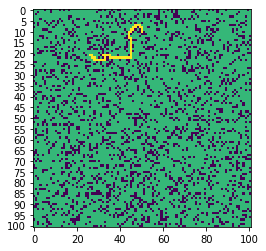

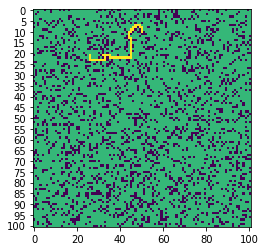

start 22 30 end 98 51 count 95


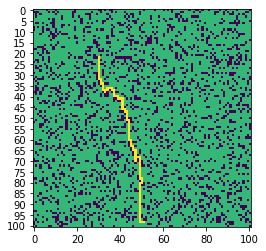

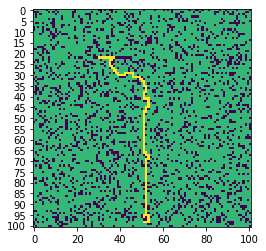

start 21 80 end 80 96 count 96


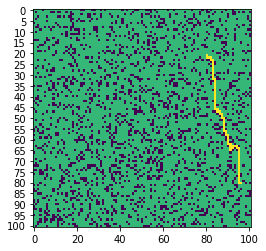

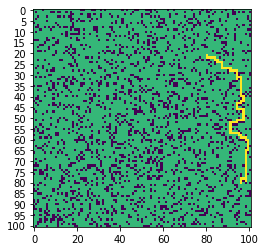

start 87 74 end 52 44 count 97


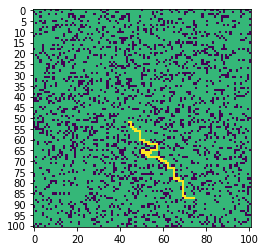

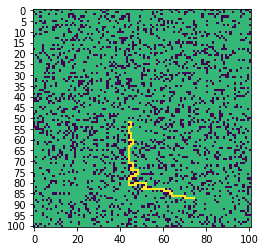

start 52 29 end 54 9 count 98


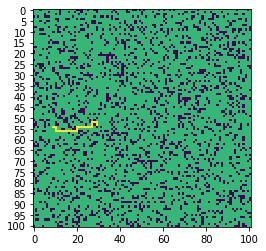

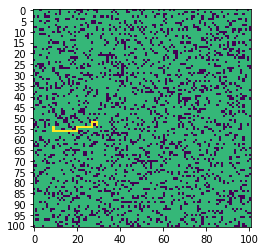

start 35 51 end 23 89 count 99


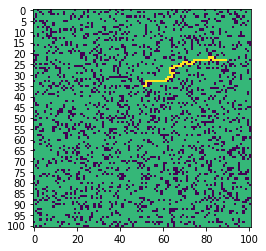

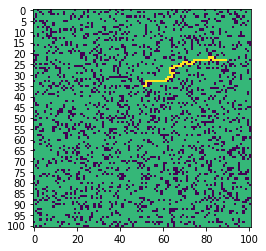

start 95 36 end 12 47 count 100


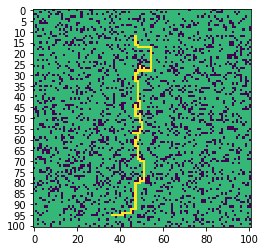

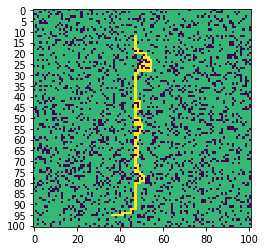

Expanded nodes array 1  [146226, 40283, 91787, 5784, 214653, 55258, 35357, 12850, 40746, 40362, 115762, 41489, 79377, 23880, 3093, 114665, 43317, 113507, 65064, 4276, 20978, 215901, 29743, 98841, 71342, 7203, 2267, 25001, 71127, 7774, 32047, 28971, 31742, 8340, 43168, 105701, 89609, 4428, 1899, 109643, 246893, 127992, 37833, 185864, 56378, 168406, 32200, 213952, 98187, 104773, 151550, 215908, 42767, 20728, 37246, 93602, 129043, 92565, 69110, 34021, 131673, 24107, 216608, 44979, 143476, 21600, 52502, 47002, 9980, 2797, 158406, 155998, 16153, 191494, 20259, 40800, 38180, 14708, 191036, 88264, 34517, 204896, 111668, 259154, 16380, 17018, 5750, 171539, 28610, 57545, 60773, 17846, 71020, 73292, 4550, 4692, 97816, 23044, 47573, 199998]
Expanded nodes array 2  [82090, 29997, 71205, 5931, 148589, 176839, 43180, 13126, 46119, 20731, 74414, 35941, 67430, 19143, 97674, 60966, 15725, 187913, 75077, 41027, 107519, 112675, 25865, 64086, 181848, 146977, 43002, 54726, 56435, 17650, 31236, 23359, 30039

/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:87: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
/Users/plaks/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:88: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


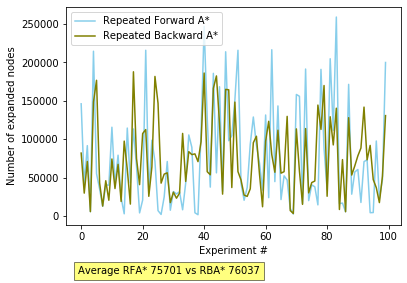

RFA* 75701 vs RBA* 76037


In [10]:
#  forward a* vs backward A*
expanded_nodes_length_1 = []
expanded_nodes_length_2 = []
for k in range(0,100):
    size = 101
    maze = [0] * size
    maze_for_second_run = [0] * size
    visited = [0] * size

    for i in range(0,size):
        maze[i] = [0] * size
        maze_for_second_run[i] = [0] * size

    for i in range(0,size):
        visited[i] = [0] * size
                            
    i = 0
    j = 0

    while True:
        generate_random_matrix(maze,visited,i,j)
        i,j = get_unvisited_indices(visited)
        if i == -1 and j == -1:
            break

    for i in range(0,size):
        for j in range(0,size):
            maze_for_second_run[i][j] = maze[i][j]

    nodes = [0] * size

    validCellsOnly = True
    source_i, source_j = validMazeCell(maze,validCellsOnly)
    destination_i, destination_j = validMazeCell(maze,validCellsOnly)
    
    
    largerG = True
    for i in range(0,size):
        nodes[i] = [0] * size

    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    open_list = MinHeap()    
    adaptive = False
    
#     print(maze)
    print('start', source_i, source_j, 'end',destination_i, destination_j, 'count', k+1)
    total_expanded_nodes, can_reach = AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list,adaptive)
    if can_reach:
        expanded_nodes_length_1.append(total_expanded_nodes)
#     print(maze)
#     showMaze(maze,1)


    open_list = MinHeap()
#     print(maze_for_second_run)
#     showMaze(maze_for_second_run,1)

    largerG = True
    for i in range(0,size):
        for j in range(0, size):
            nodes[i][j] = Node(i,j,sys.maxsize - 1000,abs(destination_i - 1 - i) + abs(destination_j -1 - j),None,-1,largerG)

    adaptive = False
    total_expanded_nodes, can_reach = AStarSearchBackwards(nodes,nodes[source_i][source_j],maze_for_second_run,nodes[destination_i][destination_j],open_list,adaptive)
    if can_reach:
        expanded_nodes_length_2.append(total_expanded_nodes)
#     showMaze(maze_for_second_run,1)


# print('start', nodes[source_i][source_j].x, nodes[source_i][source_j].y, 'end',nodes[destination_i][destination_j].x,nodes[destination_i][destination_j].y)
print('Expanded nodes array 1 ',expanded_nodes_length_1)
print('Expanded nodes array 2 ',expanded_nodes_length_2)


RFA = int(sum(expanded_nodes_length_1) / len(expanded_nodes_length_1))
RBA = int(sum(expanded_nodes_length_2) / len(expanded_nodes_length_2))


import numpy as np
import pandas as pd

df=pd.DataFrame({'x': range(0,len(expanded_nodes_length_1)), 'y1': expanded_nodes_length_1 })
df1=pd.DataFrame({'x': range(0,len(expanded_nodes_length_2)), 'y2': expanded_nodes_length_2 })
plt.plot( 'x', 'y1', data=df, color='skyblue', label = 'Forward A*')
plt.plot( 'x', 'y2', data=df1, color='olive', label = 'Backward A*')
plt.xlabel('Experiment #')
plt.ylabel('Number of expanded nodes')
plt.legend(['Repeated Forward A*', 'Repeated Backward A*'], loc='upper left')

txt_string = 'Average RFA* ' + str(RFA) +' vs RBA* ' + str(RBA)

plt.text(-1, -75000, txt_string, bbox=dict(facecolor='yellow', alpha=0.5))

plt.show()
print('RFA*', RFA, 'vs RBA*', RBA )